# Visualization of bicycle accidents  in compare with car & motocylce
# 2019-2020

## Import Libraries & packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

- In order to get more visually interactive and attractive graphics we use ***Pyplot*** library:

In [3]:
import plotly.express as px
import plotly.graph_objects as go
# execute "!pip install --upgrade plotly"  if you encounter a problem with legend display

- To install Pyplot library with Conda, run one of the following commands in *Anaconda Shell*:
>conda install -c plotly plotly

>conda install -c plotly/label/test plotly 

>conda install -c plotly plotly-orca

## Import dataset

- Import the merged dataset for 2019-2020

In [4]:
# Note : the new version of 'donnes_19_20_fusionnes.csv' has one column in addition to the olds ones : 'victim_id'
uvcl_19_20= pd.read_csv('data/donnes_19_20_fusionnes.csv', sep=';', index_col=0)

- We filter the dataset according to our usage in this notebook:

In [5]:
#Bicycle accidents victims (drivers+passengers):
bicyle_crash= uvcl_19_20[(uvcl_19_20.catv==1) & ((uvcl_19_20.catu==1) | (uvcl_19_20.catu==2))]

#Motocycles crashs victims (drivers & passengers):
moto_crash= uvcl_19_20[((uvcl_19_20.catv==2) | (uvcl_19_20.catv==30) | (uvcl_19_20.catv==31) 
    | (uvcl_19_20.catv==32) | (uvcl_19_20.catv==33) | (uvcl_19_20.catv==34)) & ((uvcl_19_20.catu==1) | (uvcl_19_20.catu==2))]

#Light vehicule crash victims (drivers & passengers):
car_crash= uvcl_19_20[(uvcl_19_20.catv==7) & ((uvcl_19_20.catu==1) | (uvcl_19_20.catu==2))]

# Concat between bicycle, motocyle & car DataFrames : 
df= pd.concat([bicyle_crash, moto_crash, car_crash], axis=0)

- Replace numerical values of the categorial features with a meaningful string of characters :

In [6]:
  # vehicule category
df.catv= df['catv'].astype( 'object')
df.catv.replace([1,7,2,30,31,32,33,34], 
    ['bicycle','light car','motocycle','motocycle','motocycle','motocycle','motocycle','motocycle'], inplace=True)

  #crash severity
df.grav= df.grav.astype('object')
df.grav.replace([1,2,3,4], ['unharmed','killed','hospitalized','slight injuries'], inplace=True)

  #Mobile obstacles:
df.obsm= df.obsm.astype('object')
df.obsm.replace([0,1,2,4,5,6,9],['none','pedestrian','vehicle','rail vehicle', 'domestic animal','wild animal', 'other'], inplace=True)

# Accidents victims according to hitted obstacle : 
df['obs'] = np.where( df.obs==0 , np.where(df.obsm=='none', 'no obstacle','mobile obstacle'), 'fix obstacle') 

- Add columns for ***hours**, **weekdays** & **months***:

In [20]:
df['hour']= pd.to_datetime(df.date).dt.hour

df['weekday']= pd.to_datetime(df.date).dt.weekday
df.weekday.replace(range(7),[ 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday', 
              'Sunday'] , inplace=True)
df['weekday']= df.weekday.astype('str')

df['month']= pd.to_datetime(df.date).dt.month
df['month'] = df.month.replace(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
df['month']= df.month.astype('str')

## Bicyle Accidents

### Severity visualization

- In this part we will use the three visualization packages we imported to compare.
#### Bicycle accidents severity visualization using *Matplotlib*:

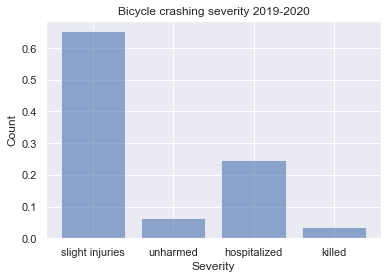

In [8]:
#gravité accidents bicyclettes: bicycle_crash.grav

plt.hist(x=bicyle_crash.grav.astype('str'), alpha=.6, density= True, bins=np.arange(5)-0.5, rwidth=.8)
plt.xticks(['1','2','3','4'], ['unharmed','killed','hospitalized','slight injuries'])
plt.ylabel('Count')
plt.xlabel('Severity')
plt.title('Bicycle crashing severity 2019-2020');

#### Bicycle accidents severity visualization using *Seaborn*:

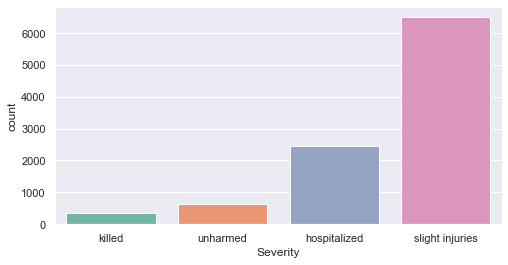

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(data=df[df.catv=='bicycle'], x='grav', palette=sns.color_palette("Set2") , 
order = df[df.catv=='bicycle'].grav.value_counts(ascending=True).index);
plt.xlabel('Severity');

#### Bicycle accidents severity visualization using *Pyplot*:

In [10]:
counts, bins = np.histogram(bicyle_crash["grav"], bins=range(1,6))# turn into data frame
dp = pd.DataFrame({"bins":bins[1:]-1, "counts":counts})# chart using Plotly.Express
dp['percentage'] =  dp.counts.apply(lambda x: str(round(x/dp['counts'].sum()*100 , 2))+" %" )

fig = px.bar(dp, x="bins", y="counts", text="percentage")

fig.update_xaxes(type='category', categoryorder='total ascending')

fig.update_layout(width=700, height=400,xaxis_title_text='Severity' , title='Bicycle crashing severity 2019-2020', title_x=.5,
    xaxis= dict(tickmode = 'array',tickvals = [1,2,3,4],ticktext = ['unharmed','killed','hospitalized','slight injuries']))

fig.update_traces(textposition='inside', marker_color='crimson', opacity=0.6)

fig.show()

### Bicycle accidents by mobile obstacle

#### Display bicycle accidents by mobile obstacle categories using *Pyplot* :

In [11]:
counts, bins = np.histogram(bicyle_crash["obsm"], bins=[i for i in range(0,11) if i not in [4,8,9]] )# turn into data frame
dp = pd.DataFrame({"bins":bins[1:]-1, "counts":counts})# chart using Plotly.Express
dp['percentage'] =  dp.counts.apply(lambda x: str(round(x/dp['counts'].sum()*100 , 2))+" %" )

fig = px.bar(dp, x="bins", y="counts", text="percentage", template="plotly_dark")

fig.update_xaxes(type='category', categoryorder='total descending')

fig.update_layout(width=800, height=500,xaxis_title_text='mobile obstacles' , 
    title='Bicycle crash victims 2019-2020 by mobile obstacle hitted',
    title_x=.5, xaxis= dict(tickmode = 'array',tickvals = [0,1,2,4,5,6,9],
    ticktext = ['none','pedestrian','vehicule','rail vehicule', 'domestic animal','wild animal', 'other']))

fig.update_traces(textposition='outside', marker_color='LightSkyBlue', opacity=0.8)


fig.show()

### Bicycle accidents in compare to motocycle & car accidents

- In the following we display the bicycle accidents in compare to cars & motocycle by :
    - Severity
    - Obstacle categories
    - Casualties

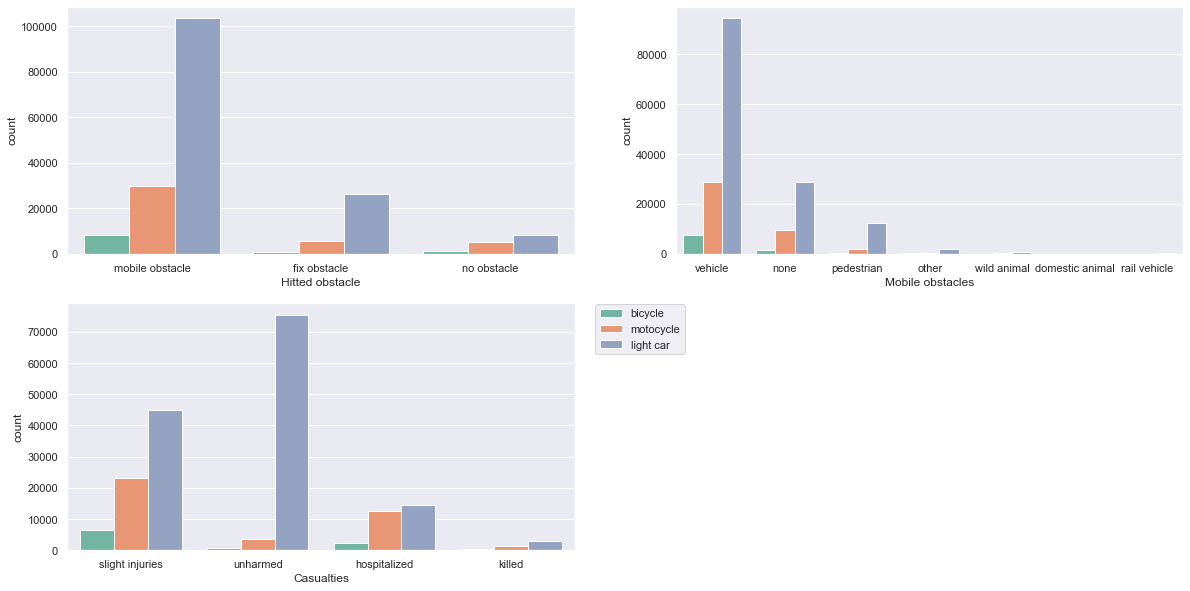

In [12]:
fig, axs = plt.subplots(2,2 , figsize=(20,10) )

sns.countplot(x=df.obsm , hue=df.catv ,ax=axs[0,1] , palette=sns.color_palette("Set2"))
axs[0,1].set(xlabel= 'Mobile obstacles')

sns.countplot(x=df.obs, hue=df.catv, ax=axs[0,0] , palette=sns.color_palette("Set2"))
axs[0,0].set(xlabel= 'Hitted obstacle')
sns.countplot(x=df.grav , hue=df.catv, ax=axs[1,0], palette=sns.color_palette("Set2", 9) )
axs[1,0].set(xlabel= 'Casualties')

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.5,.4))

fig.delaxes(axs[1, 1])
axs[0,0].get_legend().remove()
axs[0,1].get_legend().remove()
axs[1,0].get_legend().remove()
#ax[1,0].grid('all')

- The following is a reproduction for the same diplays using *Pyplot* :

In [13]:
dx= df.groupby(['catv', 'grav']).count().reset_index()

fig = px.bar( dx, x='grav', y='victim_id', title="Wide-Form Input", color='catv',  barmode='group',
    opacity=.8,color_discrete_sequence=px.colors.qualitative.T10,
    labels={'catv': 'vehicle type','grav':'severity', 'victim_id':'victims'} , template="plotly_dark")
    #category_orders={"col": ["val1", ...], ...})
fig.update_xaxes(type='category', categoryorder='total ascending')
fig.update_layout(width=1100, height=500,xaxis_title_text='Casualties severity', yaxis_title_text='Count', 
    title='Accidents injuries 2019-2020', title_x=.5, title_y=.85 , legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01) )
fig.show()

In [14]:
dx= df.groupby(['catv', 'obsm']).count().reset_index()

fig = px.bar( dx, x='obsm', y='victim_id', title="Wide-Form Input", color='catv',  barmode='group',
    opacity=.8, color_discrete_sequence=px.colors.qualitative.T10,
    labels={'catv': 'vehicle type','obsm':'mobile obstacle', 'victim_id':'victims'} , template="plotly_dark")
    #category_orders={"col": ["val1", ...], ...})
fig.update_xaxes(type='category', categoryorder='total ascending')
fig.update_layout(width=1100, height=500,xaxis_title_text='mobile obstacle', yaxis_title_text='Count', 
    title='Categories of mobile obstacle causing accidents in 2019-2020', title_x=.5, title_y=.85 ,
    legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01) )
fig.show()

In [15]:
dx= df.groupby(['catv', 'obs']).count().reset_index()

fig = px.bar( dx, x='obs', y='victim_id', title="Wide-Form Input", color='catv',  barmode='group',
    opacity=.8, color_discrete_sequence=px.colors.qualitative.T10,
    labels={'catv': 'vehicle type','obs':'obstacle category', 'victim_id':'victims'}, template="plotly_dark" )
    #category_orders={"col": ["val1", ...], ...})
fig.update_xaxes(type='category', categoryorder='total ascending')
fig.update_layout(width=1100, height=500,xaxis_title_text='obstacle category', yaxis_title_text='Count', 
    title='Obstacles hitted during accidents in 2019-2020', title_x=.5, title_y=.85 ,
    legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01) )
fig.show()

## 

## Display related time data to accidents 2019-2020

### Hourly distribution of accidents
- The following is a polar bar for the distribution of bicycle, car & motocycle accidents by hour (zoom on the center to get a close view of the bicyle category):

In [16]:
dx= df.groupby(['hour', 'catv']).count().reset_index()
#dx=dx[dx.catv=="bicycle"]
dx['hour']= dx.hour.astype('str')+':00'
fig = px.bar_polar(dx, r="victim_id", color="catv" , theta="hour",template="ggplot2",
   color_discrete_sequence= px.colors.qualitative.Set2 , 
   labels={'catv': 'vehicle type', 'victim_id':'victims'} )

fig.update_layout(
    width=1000, height=500,
    title='Accident hourly distribution 2019-2020', title_x=0.5, title_y=0.05,
    font_size=14,
    legend_font_size=13,
    polar_radialaxis= dict(angle=0, tickangle= -45, tickfont_size=10),
    polar_angularaxis_rotation=90,
    legend=dict(yanchor="top",y=0.9,xanchor="left",x=0.01)
)

fig.show()

### Accidents victims per week days

In [22]:
dx= df.groupby(['catv','weekday']).count().reset_index()

fig = px.bar(dx, x="weekday", y="victim_id", text="victim_id", color="catv" ,
    template="plotly_dark",color_discrete_sequence= px.colors.qualitative.Pastel,
    labels={'catv': 'vehicle type', 'victim_id':'victims', 'week day': 'Week day'} ,
    category_orders= {"weekday":['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}
    )

fig.update_layout(width=1000, height=500,xaxis_title_text='Week days' , 
    title='Accidents victims by week days 2019 2020',
    title_x=.5 
 )
fig.update_traces(textposition='inside', opacity=0.8  )
fig.show()

### Accidents victims per month

In [18]:
dx= df.groupby(['catv','month']).count().reset_index()

fig = px.bar(dx, x="month", y="victim_id", text="victim_id", color="catv" ,
    template="plotly_dark",color_discrete_sequence= px.colors.qualitative.Pastel,
    labels={'catv': 'vehicle type', 'victim_id':'victims', 'month': 'Months'} ,
    category_orders= {"month":['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']}
    )

fig.update_layout(width=1000, height=500,xaxis_title_text='Months' , 
    title='Monthly accidents victims 2019 2020',
    title_x=.5 
 )
fig.update_traces(textposition='inside', opacity=0.8  )
fig.show()